In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

In [2]:
# Reading whale returns
whale_returns1 = Path(r"classwork/02-Homework/04-Pandas/Starter_Code/Resources/whale_returns.csv")
whale_returns = pd.read_csv(whale_returns1)
whale_returns.columns
whale_returns.set_index(pd.to_datetime(whale_returns['Date'], infer_datetime_format = True), inplace = True)
whale_returns.drop(columns = ["Date"], inplace = True)
whale_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [3]:
 # Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
 # Drop nulls
whale_returns_clean = whale_returns.dropna().copy()
whale_returns_clean

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [5]:
 # Reading algorithmic returns
algo_returns1 = Path(r"02-Homework/04-Pandas/Starter_Code/Resources/algo_returns.csv")
algo_returns = pd.read_csv(algo_returns1)
algo_returns.columns
algo_returns.set_index(pd.to_datetime(algo_returns['Date'], infer_datetime_format = True), inplace = True)
algo_returns.drop(columns = ["Date"], inplace = True)
algo_returns

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [6]:
 # Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_returns["Algo 2"] = algo_returns["Algo 2"].fillna(0)
algo_returns_clean = algo_returns
algo_returns_clean

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,0.000000
2014-05-29,0.003978,0.000000
2014-05-30,0.004464,0.000000
2014-06-02,0.005692,0.000000
2014-06-03,0.005292,0.000000
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [8]:
 # Reading S&P 500 Closing Prices

sp500_history1 = Path(r"02-Homework/04-Pandas/Starter_Code/Resources/sp500_history.csv")
sp500_history = pd.read_csv(sp500_history1)
sp500_history.set_index(pd.to_datetime(sp500_history["Date"], infer_datetime_format = True), inplace = True)
sp500_history.drop(columns = ["Date"], inplace = True)
sp500_history.head()


,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [9]:
 # Check Data Types
sp500_history.dtypes


Close    object
dtype: object

In [10]:
 # Fix Data Types
sp500_history['Close'] = sp500_history["Close"].str.replace("$", "", regex = True)
sp500_history['Close'] = sp500_history["Close"].astype("float")
sp500_history.dtypes

Close    float64
dtype: object

In [11]:
 # Calculate Daily Returns
sp_daily_returns = sp500_history.pct_change()
sp_daily_returns.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [12]:
# Drop nulls
sp500 = sp_daily_returns.dropna()
sp500.head()

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [13]:
 # Rename `Close` Column to be specific to this portfolio.
sp500_clean = sp500_history.rename(columns={"Close": "Sp500_Close"})

sp500_clean

,Sp500_Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06
...,...
2012-10-05,1460.93
2012-10-04,1461.40
2012-10-03,1450.99


In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_returns = pd.concat([whale_returns_clean, algo_returns_clean, sp500_clean], axis ="columns", join ="inner")
combined_returns = combined_returns.fillna(0)

combined_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Sp500_Close
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,2107.78
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,2098.53
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,2101.04
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,2071.26
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,2079.43


<AxesSubplot:xlabel='Date'>

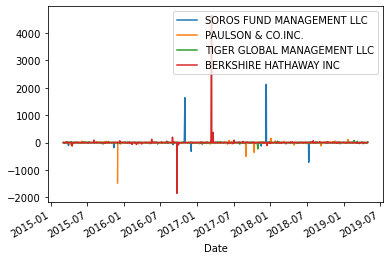

In [15]:
 # Plot daily returns of all portfolios
daily_combined_returns = whale_returns_clean.pct_change()
daily_combined_returns.plot()


<AxesSubplot:xlabel='Date'>

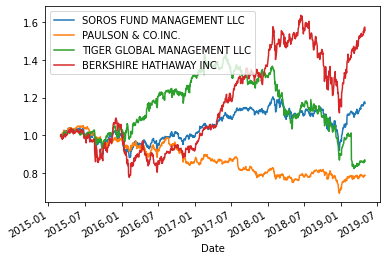

In [16]:
 # Calculate cumulative returns of all portfolios
cum_combinded_returns = ((whale_returns_clean.iloc[:, 0:4] +1).cumprod().iloc[:, 0:4])
# Plot cumulative returns
cum_combinded_returns.plot()

<AxesSubplot:>

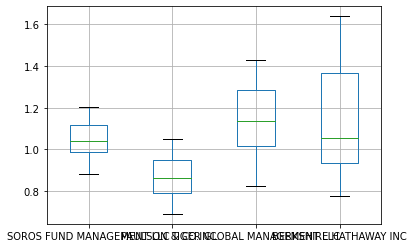

In [17]:
 # Box plot to visually show risk
cum_combinded_returns.boxplot()



In [18]:
 # Calculate the daily standard deviations of all portfolios
whale_returns_dev = (whale_returns_clean/whale_returns_clean.shift(1)) - 1
whale_returns_dev.dropna(inplace=True)
whale_returns_dev

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-04,-2.762070,-1.650792,4.113646,-1.641381
2015-03-05,0.800968,0.257544,-1.929234,0.596558
2015-03-06,-2.968465,-1.876837,-4.601872,-2.947282
2015-03-09,-1.073656,-2.182252,-1.688907,-0.873840
2015-03-10,-18.625495,-2.263954,-3.067380,4.893672
...,...,...,...,...
2019-04-25,-1.124733,-2.279801,0.288325,-1.759149
2019-04-26,-29.607053,-8.097525,-3.397536,1.152302
2019-04-29,-0.846082,-0.703202,-0.494071,-0.499394


<AxesSubplot:xlabel='Date'>

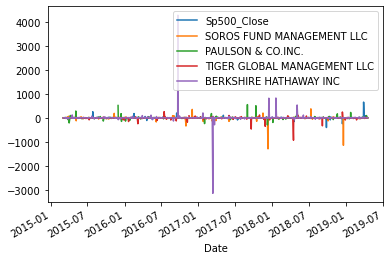

In [19]:
 # Calculate  the daily standard deviation of S&P 500
sp500_clean_dev = (sp500_clean/sp500_clean.shift(1)) -1
sp500_clean_dev.dropna(inplace=True)
sp500_clean_dev


# Determine which portfolios are riskier than the S&P 500
riskier_than_sp500 = pd.concat([sp500_clean_dev, whale_returns_dev], axis='columns', join='inner')
riskier_than_sp500.dropna(inplace=True)
risk = riskier_than_sp500.pct_change()
risk.plot()

In [20]:
 # Calculate the annualized standard deviation (252 trading days)
annual_dev =((whale_returns_clean/whale_returns_clean.shift(1))-1)*np.sqrt(252)
annual_dev.dropna(inplace=True)
annual_dev.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-04,-43.846498,-26.205505,65.302104,-26.056114
2015-03-05,12.714976,4.088384,-30.625636,9.470066
2015-03-06,-47.122916,-29.793863,-73.052461,-46.786651
2015-03-09,-17.043766,-34.642183,-26.810561,-13.871775
2015-03-10,-295.670567,-35.939154,-48.693142,77.684632


<AxesSubplot:xlabel='Date'>

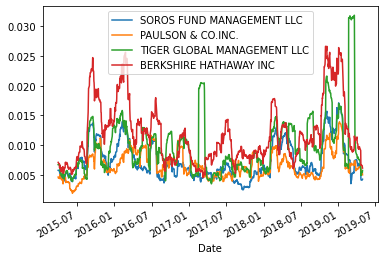

In [21]:
 # Calculate the rolling standard deviation for all portfolios using a 21-day window
portfolio_21 = whale_returns_clean.rolling(window=21).std()

    
# Plot the rolling standard deviation
portfolio_21.plot()

In [22]:
 # Calculate the correlation
correlation = whale_returns_clean.corr()
# Display de correlation matrix
correlation.heatmap()

AttributeError: 'DataFrame' object has no attribute 'heatmap'

In [ ]:
 # Calculate covariance of a single portfolio
whale_returns_covariance = (combined_returns['BERKSHIRE HATHAWAY INC']).cov(combined_returns['Sp500_Close'])
# Calculate variance of S&P 500
sp500_var = (combined_returns['Sp500_Close']).var()
sp500_var
# Computing beta
beta = whale_returns_covariance / sp500_var

# Plot beta trend
beta

In [ ]:
 # Use `ewm` to calculate the rolling window
whale_returns_clean.ewm(com=0.3).mean()

In [ ]:
 # Annualized Sharpe Ratios
An_Sharpe_Rat = (whale_returns_clean.mean() * (252)) / (whale_returns_clean.std() * np.sqrt(252))
An_Sharpe_Rat


In [ ]:
 # Visualize the sharpe ratios as a bar plot
An_Sharpe_Rat.plot(kind="bar", title="Sharpe Ratios")

In [ ]:
 # Reading data from 1st stock
Soros = whale_returns_clean.iloc[:,[0]]
Soros

In [ ]:
 # Reading data from 2nd stock
Paulson = whale_returns_clean.iloc[:,[1]]
Paulson

In [ ]:
# Reading data from 3rd stock
Tiger = whale_returns_clean.iloc[:,[2]]
Tiger

In [ ]:
 # Combine all stocks in a single DataFrame
combined_stocks = pd.concat([Soros, Paulson, Tiger], axis ="columns", join ="inner")
combined_stocks

In [ ]:
 # Reset Date index
combined_stocks.head()

In [ ]:
 # Reorganize portfolio data by having a column per symbol
combined_stocks.head()

In [ ]:
# Calculate daily returns
daily_returns = (combined_stocks - combined_stocks.shift(1)) / combined_stocks.shift(1)
# Drop NAs
daily_returns.dropna(inplace=True)
# Display sample data
daily_returns.head()

In [ ]:
 # Set weights
soros_weight = 1/3
paulson_weight = 1/3
tiger_weight = 1/3
# Calculate portfolio return
portfolio_returns = soros_weight*daily_returns['SOROS FUND MANAGEMENT LLC'] * paulson_weight * daily_returns['PAULSON & CO.INC. '] * tiger_weight * daily_returns['TIGER GLOBAL MANAGEMENT LLC']
# Display sample data


portfolio_returns.head()



In [ ]:
 # Join your returns DataFrame to the original returns DataFrame
returns_df = pd.concat([portfolio_returns, whale_returns], axis='columns', join='inner')
returns_df

In [ ]:
 # Only compare dates where return data exists for all the stocks (drop NaNs)
returns_df = returns_df.dropna()
returns_df


In [ ]:
 # Calculate the annualized `std`
returns_annual = returns_df.std()*np.sqrt(252)
returns_annual

In [ ]:
 # Calculate rolling standard deviation
returns_rolling = returns_df.rolling(window=365).std()
# Plot rolling standard deviation
returns_rolling.plot()

In [ ]:
 # Calculate and plot the correlation
returns_corr = returns_df.corr()
returns_corr.plot(figsize=(20, 10))

In [ ]:
 # Calculate and plot Beta
soros_covariance = returns_df['SOROS FUND MANAGEMENT LLC'].cov(combined_returns['Sp500_Close'])
paulson_covariance = returns_df['PAULSON & CO.INC. '].cov(combined_returns['Sp500_Close'])
tiger_covariance = returns_df['TIGER GLOBAL MANAGEMENT LLC'].cov(combined_returns['Sp500_Close'])
variance = combined_returns['Sp500_Close'].var()
soros_returns_beta = soros_covariance / variance
paulson_returns_beta = paulson_covariance / variance
tiger_returns_beta = tiger_covariance / variance
soros_returns_beta


In [ ]:
 # Calculate Annualized Sharpe Ratios
returns_annual_sharpe = (returns_df.mean() * (252)) / (returns_df.std() * np.sqrt(252))

In [ ]:
 # Visualize the sharpe ratios as a bar plot
returns_annual_sharpe.plot(kind="bar", title="Sharpe Ratios")

In [ ]:
#How does your portfolio do?
'no clue'

#Write your answer here!
print('need clearer instructions for the last 7-8 cells')
